# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
# Try using different encodings to find the correct one

df = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')  # or encoding='latin1', or encoding='cp1252'

In [3]:
df = pd.read_csv('marketing.csv')

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [4]:
# Calculate the percentage of missing values in each column

missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:\n", missing_percentage)

Percentage of missing values in each column:
 ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64


### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [5]:
# Check for duplicate records
duplicate_records = df.duplicated().sum()
print(f"Number of duplicate records: {duplicate_records}")

# Drop duplicate records
df = df.drop_duplicates()
print("Dataset after dropping duplicates:\n", df)


Number of duplicate records: 0
Dataset after dropping duplicates:
          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurcha

### 5. Drop the columns which you think redundant for the analysis 

In [6]:
# Identify redundant columns (for example, columns with low variance or high correlation)
redundant_columns = ['Recency']  # Manually identified in this example
df = df.drop(columns=redundant_columns)
print("Dataset after dropping redundant columns:\n", df)


Dataset after dropping redundant columns:
          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  MntWines  MntFruits  ...  NumCatalogPurchases  \
0            0 

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [7]:
# Check the unique categories in the 'Marital_Status' column
unique_categories = df['Marital_Status'].unique()
print("Unique categories in 'Marital_Status':", unique_categories)

# Group the categories as specified
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married': 'Relationship',
    'Together': 'Relationship',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Single'
})

# Check the updated unique categories
updated_unique_categories = df['Marital_Status'].unique()
print("Updated unique categories in 'Marital_Status':", updated_unique_categories)

print("Dataset after grouping categories:\n", df)

Unique categories in 'Marital_Status': ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Updated unique categories in 'Marital_Status': ['Single' 'Relationship']
Dataset after grouping categories:
          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   Relationship  71613.0        0   
3      6182        1984  Graduation   Relationship  26646.0        1   
4      5324        1981         PhD   Relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   Relationship  61223.0        0   
2236   4001        1946         PhD   Relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   Relationship  69245

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [8]:
# Group the specified columns into 'Total_Expenses'
df['Total_Expenses'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Drop the original individual columns if they are no longer needed
df = df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])

print("Dataset after grouping expenses into 'Total_Expenses':\n", df)

Dataset after grouping expenses into 'Total_Expenses':
          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   Relationship  71613.0        0   
3      6182        1984  Graduation   Relationship  26646.0        1   
4      5324        1981         PhD   Relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   Relationship  61223.0        0   
2236   4001        1946         PhD   Relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   Relationship  69245.0        0   
2239   9405        1954         PhD   Relationship  52869.0        1   

      Teenhome Dt_Customer  NumDealsPurchases  NumWebPurchases  ...  \
0       

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [9]:
# Group the specified columns into 'Num_Total_Purchases'
df['Num_Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

# Drop the original individual columns if they are no longer needed
df = df.drop(columns=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'])

print("Dataset after grouping purchases into 'Num_Total_Purchases':\n", df)

Dataset after grouping purchases into 'Num_Total_Purchases':
          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   Relationship  71613.0        0   
3      6182        1984  Graduation   Relationship  26646.0        1   
4      5324        1981         PhD   Relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   Relationship  61223.0        0   
2236   4001        1946         PhD   Relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   Relationship  69245.0        0   
2239   9405        1954         PhD   Relationship  52869.0        1   

      Teenhome Dt_Customer  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [10]:
# Assuming df is your dataframe containing 'Kidhome' and 'Teenhome'
df['Kids'] = df['Kidhome'] + df['Teenhome']
print("Dataset after grouping Kidhome' and 'Teenhome into 'Kids':\n", df)

Dataset after grouping Kidhome' and 'Teenhome into 'Kids':
          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   Relationship  71613.0        0   
3      6182        1984  Graduation   Relationship  26646.0        1   
4      5324        1981         PhD   Relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   Relationship  61223.0        0   
2236   4001        1946         PhD   Relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   Relationship  69245.0        0   
2239   9405        1954         PhD   Relationship  52869.0        1   

      Teenhome Dt_Customer  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [11]:
# Assuming df is your dataframe containing the mentioned columns
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

### 11. Drop those columns which we have used above for obtaining new features

In [12]:
# Assuming df is your dataframe
# First, create the new feature
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

# Now, drop the original columns used to create the new feature
columns_to_drop = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df = df.drop(columns=columns_to_drop)
print("Dataset after Dropping columns:\n", df)

Dataset after Dropping columns:
          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   Relationship  71613.0        0   
3      6182        1984  Graduation   Relationship  26646.0        1   
4      5324        1981         PhD   Relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   Relationship  61223.0        0   
2236   4001        1946         PhD   Relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   Relationship  69245.0        0   
2239   9405        1954         PhD   Relationship  52869.0        1   

      Teenhome Dt_Customer  NumWebVisitsMonth  Complain  Total_Expenses  \
0            0    4/9/2012 

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [13]:
# Calculate age
current_year = date.today().year
df['Age'] = current_year - df['Year_Birth']

# Drop the 'Year_Birth' column
df.drop(columns=['Year_Birth'], inplace=True)

# Display the resulting DataFrame
print(df)


         ID   Education Marital_Status   Income  Kidhome  Teenhome  \
0      5524  Graduation         Single  58138.0        0         0   
1      2174  Graduation         Single  46344.0        1         1   
2      4141  Graduation   Relationship  71613.0        0         0   
3      6182  Graduation   Relationship  26646.0        1         0   
4      5324         PhD   Relationship  58293.0        1         0   
...     ...         ...            ...      ...      ...       ...   
2235  10870  Graduation   Relationship  61223.0        0         1   
2236   4001         PhD   Relationship  64014.0        2         1   
2237   7270  Graduation         Single  56981.0        0         0   
2238   8235      Master   Relationship  69245.0        0         1   
2239   9405         PhD   Relationship  52869.0        1         1   

     Dt_Customer  NumWebVisitsMonth  Complain  Total_Expenses  \
0       4/9/2012                  7         0            1617   
1       8/3/2014             

### 13. Encode the categorical variables in the dataset

In [14]:
from sklearn.preprocessing import LabelEncoder

# Load data from an external file
## df = pd.read_csv('your_file.csv')

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Save the transformed data to a new file
print(df)

         ID  Education  Marital_Status   Income  Kidhome  Teenhome  \
0      5524          2               1  58138.0        0         0   
1      2174          2               1  46344.0        1         1   
2      4141          2               0  71613.0        0         0   
3      6182          2               0  26646.0        1         0   
4      5324          4               0  58293.0        1         0   
...     ...        ...             ...      ...      ...       ...   
2235  10870          2               0  61223.0        0         1   
2236   4001          4               0  64014.0        2         1   
2237   7270          2               1  56981.0        0         0   
2238   8235          3               0  69245.0        0         1   
2239   9405          4               0  52869.0        1         1   

      Dt_Customer  NumWebVisitsMonth  Complain  Total_Expenses  \
0             553                  7         0            1617   
1             629          

In [15]:
label_encoder = LabelEncoder()

# Encode the 'Marital_Status ' column
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

print(df)

         ID  Education  Marital_Status   Income  Kidhome  Teenhome  \
0      5524          2               1  58138.0        0         0   
1      2174          2               1  46344.0        1         1   
2      4141          2               0  71613.0        0         0   
3      6182          2               0  26646.0        1         0   
4      5324          4               0  58293.0        1         0   
...     ...        ...             ...      ...      ...       ...   
2235  10870          2               0  61223.0        0         1   
2236   4001          4               0  64014.0        2         1   
2237   7270          2               1  56981.0        0         0   
2238   8235          3               0  69245.0        0         1   
2239   9405          4               0  52869.0        1         1   

      Dt_Customer  NumWebVisitsMonth  Complain  Total_Expenses  \
0             553                  7         0            1617   
1             629          

### 14. Standardize the columns, so that values are in a particular range

In [16]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the standardized data
print(df_standardized)


            ID  Education  Marital_Status    Income   Kidhome  Teenhome  \
0    -0.020999  -0.350141        1.346874  0.234063 -0.825218 -0.929894   
1    -1.053058  -0.350141        1.346874 -0.234559  1.032559  0.906934   
2    -0.447070  -0.350141       -0.742460  0.769478 -0.825218 -0.929894   
3     0.181716  -0.350141       -0.742460 -1.017239  1.032559 -0.929894   
4    -0.082614   1.428354       -0.742460  0.240221  1.032559 -0.929894   
...        ...        ...             ...       ...       ...       ...   
2235  1.625983  -0.350141       -0.742460  0.356642 -0.825218  0.906934   
2236 -0.490200   1.428354       -0.742460  0.467539  2.890335  0.906934   
2237  0.516905  -0.350141        1.346874  0.188091 -0.825218 -0.929894   
2238  0.814199   0.539106       -0.742460  0.675388 -0.825218  0.906934   
2239  1.174650   1.428354       -0.742460  0.024705  1.032559  0.906934   

      Dt_Customer  NumWebVisitsMonth  Complain  Total_Expenses  \
0        1.187363           0.693

### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [24]:

# Check for NaN values
print(df.isnull().sum())  # This will show NaN counts in each column



ID                     0
Education              0
Marital_Status         0
Kidhome                0
Teenhome               0
Dt_Customer            0
NumWebVisitsMonth      0
Complain               0
Total_Expenses         0
Num_Total_Purchases    0
Kids                   0
TotalAcceptedCmp       0
Age                    0
dtype: int64


In [23]:
df.drop('Income', axis=1, inplace=True)

In [25]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your dataset
##df = pd.read_csv('data.csv')

# Check if there are samples in the dataset
if df.shape[0] == 0:
    print("Error: Dataset has 0 samples. PCA cannot be performed.")
else:
    # Separate features and target if applicable
    # Example assumes all columns except the target are features
    X = df.drop(columns=['Education'])  # Adjust 'target_column' as needed
    y = df['Education']  # If applicable

    # Perform standardization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA
    pca = PCA(n_components=min(X.shape[0], X.shape[1]))  # Use min for safety
    pca.fit(X_scaled)

    # Determine number of components explaining desired variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumulative_variance >= 0.90) + 1  # Adjust for variance threshold

    print(f"Number of PCA components to explain 90% variance: {n_components}")


Number of PCA components to explain 90% variance: 9


### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

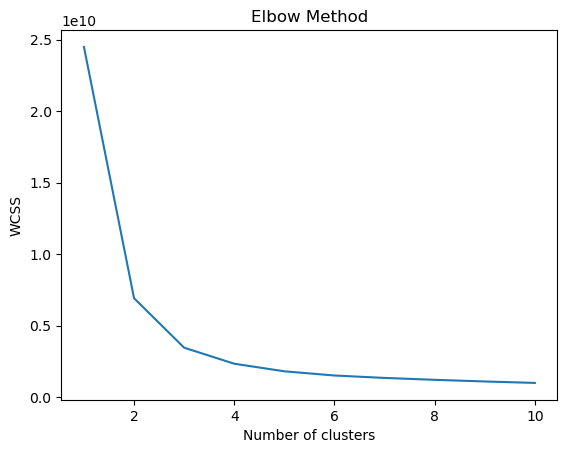

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X=df
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [28]:
optimal_k = 3  # Example optimal K value
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [29]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.5232780911693423


### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

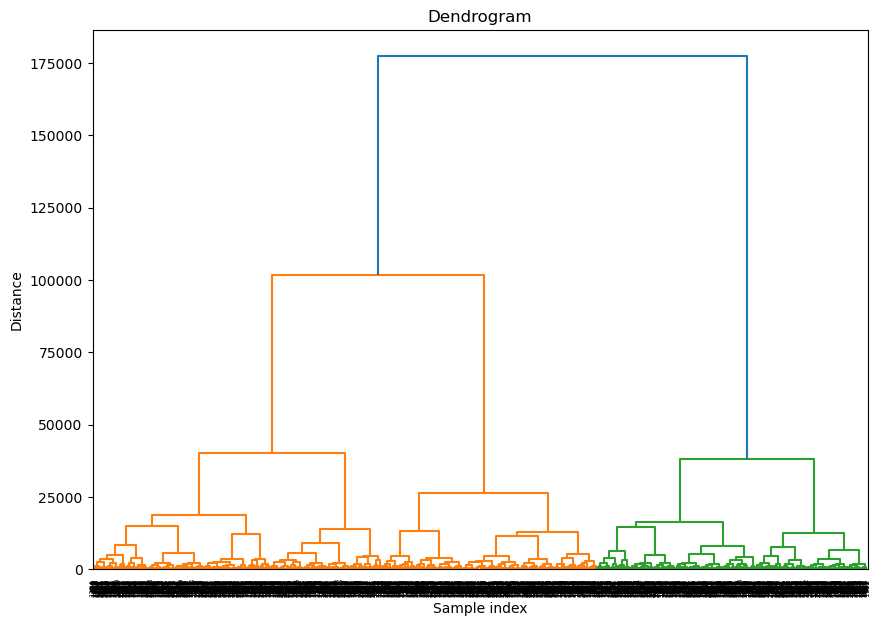

In [31]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [32]:
from sklearn.cluster import AgglomerativeClustering

optimal_k = 10  # Example optimal K value
agglomerative = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
y_agg = agglomerative.fit_predict(X)


In [33]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, y_agg)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.30472967551490765


### Visualization and Interpretation of results

-----
## Happy Learning
-----